In [8]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_interactions import ioff, panhandler, zoom_factory
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [9]:
from scipy import fft
import scipy.signal as sig

In [10]:
fs = 250

# read in eeg csv retrieved from LSL
eeg_data1 = pd.read_csv("eeg_data1.csv")
eeg_data1["timestamp"] = eeg_data1["timestamp"] - eeg_data1["timestamp"].min()

eeg_data1

,timestamp,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.000000,41005.503906,22562.341797,-11849.196289,-187500.015625,-187500.015625,-187500.015625,120200.101562,-2038.233276
1,0.004000,17840.179688,-288.985718,-35819.496094,-187500.015625,-187500.015625,-187500.015625,97042.914062,-25955.695312
2,0.008000,-1258.067993,-19350.888672,-54653.343750,-187500.015625,-187500.015625,-187500.015625,77836.617188,-44850.921875
3,0.012000,16017.505859,-2338.752441,-36623.355469,-187500.015625,-187500.015625,-187500.015625,95074.843750,-26880.005859
4,0.016000,41677.800781,23203.300781,-11017.532227,-187500.015625,-187500.015625,-187500.015625,120844.390625,-1231.894043
...,...,...,...,...,...,...,...,...,...
18895,75.465388,-16392.099609,-34260.464844,-69632.906250,-187500.015625,-187500.015625,-187500.015625,62578.847656,-59858.886719
18896,75.469388,10156.878906,-8057.401367,-42189.386719,-187500.015625,-187500.015625,-187500.015625,89126.914062,-32478.962891
18897,75.473388,34547.460938,16296.120117,-18117.363281,-187500.015625,-187500.015625,-187500.015625,113688.750000,-8334.875977
18898,75.477388,7293.217773,-10581.092773,-46355.796875,-187500.015625,-187500.015625,-187500.015625,86429.257812,-36506.792969


In [11]:
eeg_data1 = eeg_data1.drop(columns=['channel4', 'channel5', 'channel6']) # remove unused channels
eeg_data1

,timestamp,channel1,channel2,channel3,channel7,channel8
0,0.000000,41005.503906,22562.341797,-11849.196289,120200.101562,-2038.233276
1,0.004000,17840.179688,-288.985718,-35819.496094,97042.914062,-25955.695312
2,0.008000,-1258.067993,-19350.888672,-54653.343750,77836.617188,-44850.921875
3,0.012000,16017.505859,-2338.752441,-36623.355469,95074.843750,-26880.005859
4,0.016000,41677.800781,23203.300781,-11017.532227,120844.390625,-1231.894043
...,...,...,...,...,...,...
18895,75.465388,-16392.099609,-34260.464844,-69632.906250,62578.847656,-59858.886719
18896,75.469388,10156.878906,-8057.401367,-42189.386719,89126.914062,-32478.962891
18897,75.473388,34547.460938,16296.120117,-18117.363281,113688.750000,-8334.875977
18898,75.477388,7293.217773,-10581.092773,-46355.796875,86429.257812,-36506.792969


In [12]:
# examine range of channels
eeg_data1.describe()

,timestamp,channel1,channel2,channel3,channel7,channel8
count,18900.000000,18900.000000,18900.000000,18900.000000,18900.000000,18900.000000
mean,37.744899,3450.125142,-14673.435841,-49583.631284,82563.912883,-39768.947152
std,21.788278,10836.587876,10750.022093,10973.658195,10855.490229,10970.139143
min,0.000000,-27326.371094,-45314.050781,-80604.570312,51679.535156,-70818.617188
25%,18.874775,-6130.021851,-24171.724609,-59306.626953,72960.796875,-49503.782227
50%,37.709200,3547.054199,-14596.169922,-49469.740234,82670.140625,-39662.052734
75%,56.619506,11832.398438,-6397.287109,-41057.208008,90970.775391,-31237.770020
max,75.481388,69328.312500,51047.429688,16539.552734,148430.640625,26321.035156


<Axes: >

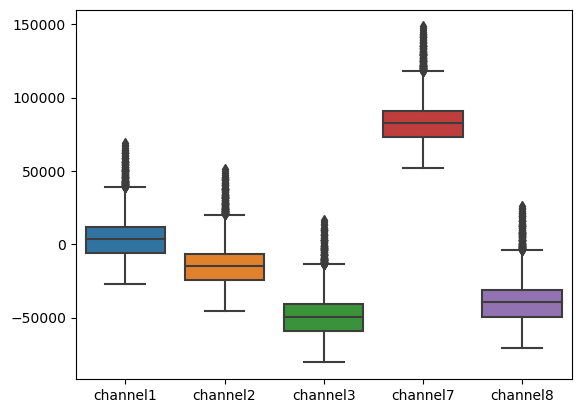

In [13]:
sns.boxplot(eeg_data1.drop(columns=['timestamp']))

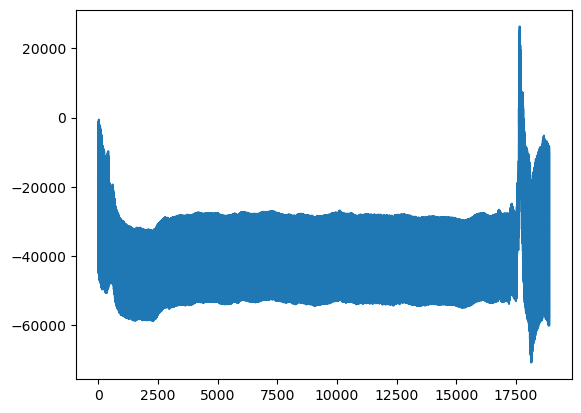

In [25]:
plt.figure()
plt.plot(eeg_data1["channel8"])
plt.show()

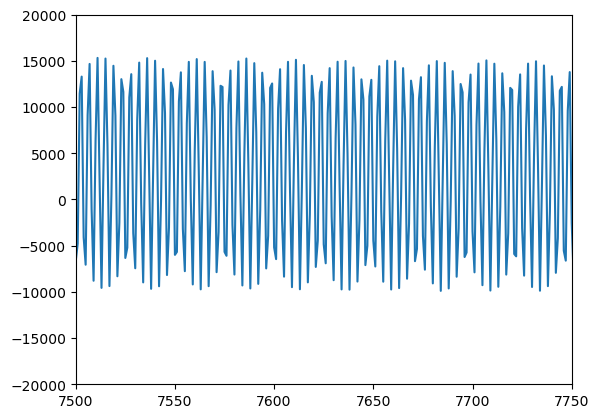

In [7]:
plt.figure()
plt.plot(eeg_data1["channel1"])
plt.xlim([7500, 7750]) # plots 2 seconds
plt.ylim([-20000, 20000])
plt.show()

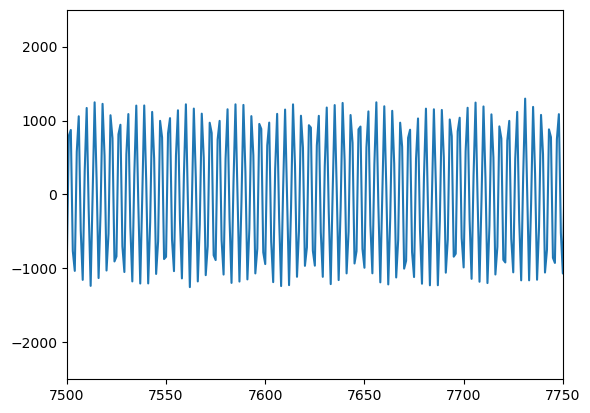

In [8]:
echan1 = eeg_data1["channel1"]

sos = sig.butter(4, [3*2/fs, 40*2/fs], btype='bandpass', output='sos') #create the bandpass filter
filt_data = sig.sosfilt(sos, echan1)

plt.figure()
plt.plot(filt_data)
plt.xlim([7500, 7750]) # plots 1 seconds
plt.ylim([-2500, 2500])
plt.show()

In [9]:
pd.DataFrame(filt_data).describe()

,0
count,18900.000000
mean,-0.061590
std,1080.579809
min,-10475.490064
25%,-898.885808
50%,3.290263
75%,897.267290
max,14447.894683


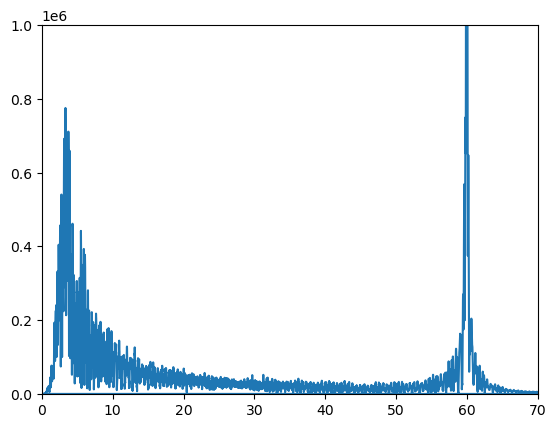

In [11]:
echan1_fft = np.abs(fft.fft(filt_data))
freq = np.fft.fftfreq(len(echan1_fft), 1/fs)

plt.figure()
plt.plot(freq, echan1_fft)
plt.xlim([0, 70])
plt.ylim([0, 1000000])
plt.show()

In [16]:
fs

250

In [17]:
f0 = 60.0
Q = 30.0

b, a = sig.iirnotch(f0, Q, fs)

In [18]:
b

array([ 0.97547839, -0.12250159,  0.97547839])

In [19]:
a

array([ 1.        , -0.12250159,  0.95095678])

In [20]:
filt_data = sig.sosfilt(sos, echan1)

NameError: name 'sos' is not defined

In [21]:
echan1_notch, h = sig.freqz(b, a, fs=fs)

In [22]:
echan1_notch_fft = np.abs(fft.fft(echan1_))
freq = np.fft.fftfreq(len(echan1_fft), 1/fs)

plt.figure()
plt.plot(freq, echan1_fft)
plt.xlim([0, 70])
plt.ylim([0, 1000000])
plt.show()

NameError: name 'echan1_' is not defined